# Assignment 2

### Data Visualization and Pre-processing

Tasks:-
1. Download the dataset: (https://drive.google.com/file/d/1_HcM0K8wt4b7FMLkc1V1dv0y6I_9ULzy/view)
2. Load the dataset.
3. Perform Below Visualizations.
* Univariate Analysis
* Bi - Variate Analysis
* Multi - Variate Analysis

4. Perform descriptive statistics on the dataset.
5. Handle the Missing values.
6. Find the outliers and replace the outliers
7. Check for Categorical columns and perform encoding.
8. Split the data into dependent and independent variables.
9. Scale the independent variables
10. Split the data into training and testing

#### Import necessary library 

In [143]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Laod dataset

In [144]:
df = pd.read_csv("Churn_Modelling.csv")
df = df.drop(['RowNumber','CustomerId','Surname'],axis = 1)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


#### Data Visualization

<AxesSubplot: xlabel='CreditScore', ylabel='Count'>

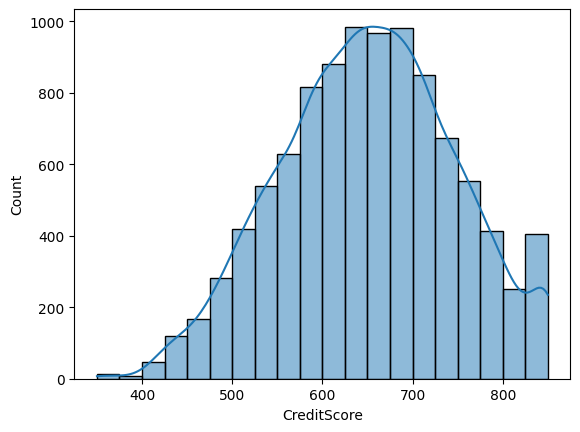

In [146]:
sns.histplot(data=df['CreditScore'],bins = 20,kde=True)


<AxesSubplot: xlabel='Age', ylabel='Count'>

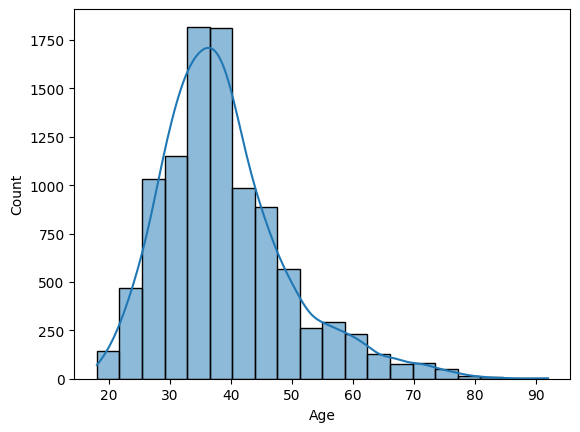

In [147]:
sns.histplot(data=df['Age'],bins = 20,kde=True)


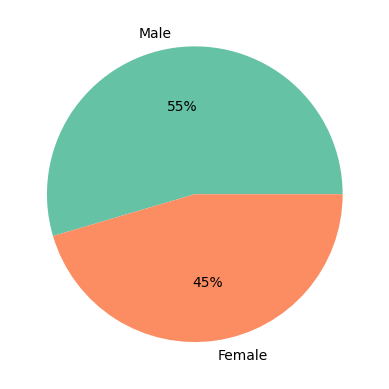

In [148]:
countMale = (df['Gender'] == 'Male').sum() 
countFemale = (df['Gender'] == 'Female').sum()
palette_color  = sns.color_palette("Set2")

plt.pie([countMale,countFemale ], labels=['Male', 'Female'], colors=palette_color,autopct='%.0f%%')
plt.show()

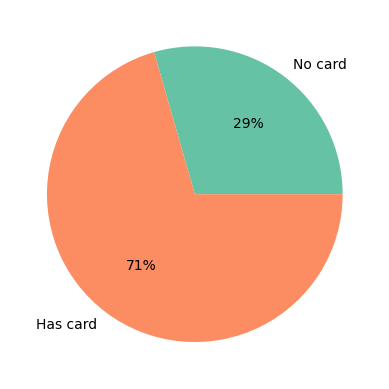

In [149]:
countHasCrCardZeros = (df['HasCrCard'] == 0).sum() 
countHasCrCardOnes = (df['HasCrCard'] == 1).sum()
palette_color  = sns.color_palette("Set2")

plt.pie([countHasCrCardZeros,countHasCrCardOnes ], labels=['No card', 'Has card'], colors=palette_color,autopct='%.0f%%')
plt.show()


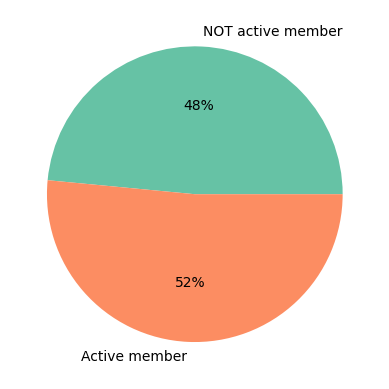

In [150]:
countIsActiveMemberZeros = (df['IsActiveMember'] == 0).sum() 
countIsActiveMemberOnes = (df['IsActiveMember'] == 1).sum()

plt.pie([countIsActiveMemberZeros,countIsActiveMemberOnes ], labels=['NOT active member','Active member'], colors=palette_color,autopct='%.0f%%')
plt.show()
  

<AxesSubplot: >

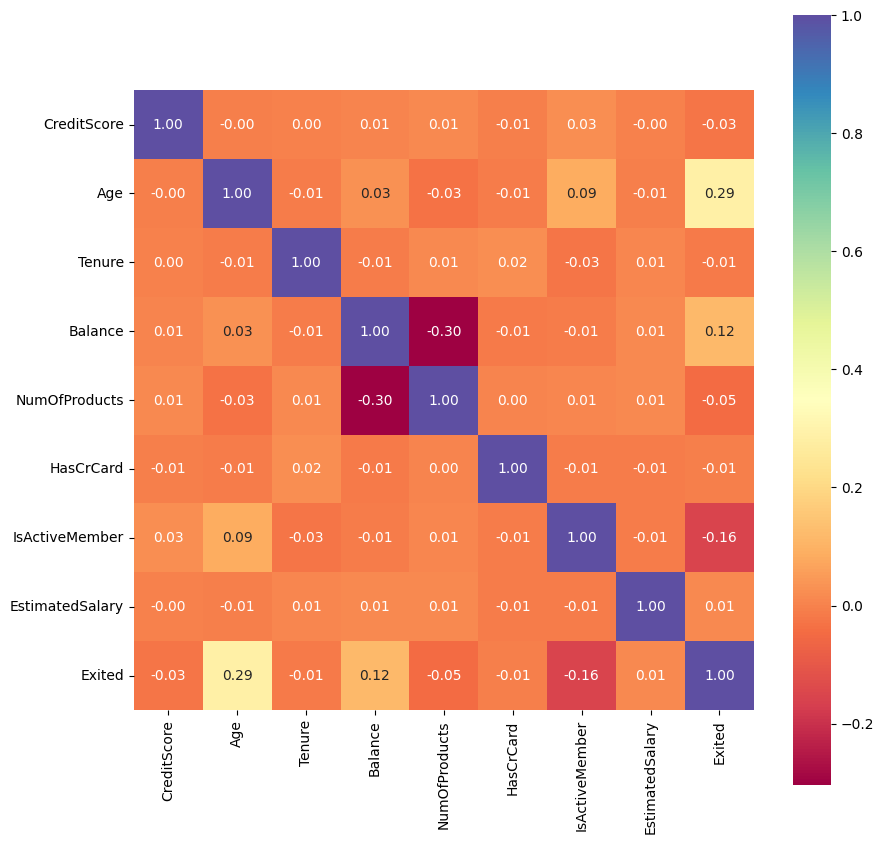

In [151]:
corrmat = df.corr()
plt.subplots(figsize=(10,10))
sns.heatmap(corrmat, cbar=True,cmap="Spectral", annot=True, square=True, fmt='.2f')

#### Descriptive statistics

In [152]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


In [153]:
df[df['CreditScore'].isin([600,700])].groupby(['Age','EstimatedSalary']).mean()

CreditScore  Tenure    Balance  NumOfProducts  HasCrCard  \
Age EstimatedSalary                                                             
26  50051.42               700.0     2.0       0.00            2.0        0.0   
    82547.01               600.0     6.0  108909.12            1.0        1.0   
    141926.43              700.0     4.0  119009.57            1.0        1.0   
27  8996.79                700.0     6.0  137963.07            1.0        0.0   
    125698.97              600.0     3.0       0.00            2.0        0.0   
...                          ...     ...        ...            ...        ...   
54  139735.54              700.0     1.0   79415.67            1.0        0.0   
57  103548.25              600.0     9.0  138456.03            2.0        1.0   
58  6209.51                600.0     8.0  118723.11            1.0        0.0   
59  142977.05              700.0     5.0  137648.41            1.0        1.0   
82  182055.36              700.0     2.0       0.00            2.0        0.0   

                     IsActiveMember  Exited  
Age EstimatedSalary                          
26  50051.42                    0.0     0.0  
    82547.01                    0.0     0.0  
    141926.43                   0.0     0.0  
27  8996.79                     0.0     0.0  
    125698.97                   1.0     0.0  
...                             ...     ...  
54  139735.54                   1.0     0.0  
57  103548.25                   1.0     0.0  
58  6209.51                     0.0     1.0  
59  142977.05                   0.0     1.0  
82  182055.36                   1.0     0.0  

[64 rows x 7 columns]

#### Handle the Missing values

In [154]:
df.isna().any()

CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [155]:
df['Gender'].replace(['Female', 'Male'],[0, 1], inplace=True)
df['Geography'].replace(['France', 'Spain','Germany'],[0, 1,2], inplace=True)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,1,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,1,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,772,2,1,42,3,75075.31,2,1,0,92888.52,1


In [157]:
X = df.iloc[:, :-1].values
print(X)

[[6.1900000e+02 0.0000000e+00 0.0000000e+00 ... 1.0000000e+00
  1.0000000e+00 1.0134888e+05]
 [6.0800000e+02 1.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  1.0000000e+00 1.1254258e+05]
 [5.0200000e+02 0.0000000e+00 0.0000000e+00 ... 1.0000000e+00
  0.0000000e+00 1.1393157e+05]
 ...
 [7.0900000e+02 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  1.0000000e+00 4.2085580e+04]
 [7.7200000e+02 2.0000000e+00 1.0000000e+00 ... 1.0000000e+00
  0.0000000e+00 9.2888520e+04]
 [7.9200000e+02 0.0000000e+00 0.0000000e+00 ... 1.0000000e+00
  0.0000000e+00 3.8190780e+04]]


In [159]:
y = df.iloc[:, -1].values
print(y)

[1 0 1 ... 1 1 0]


#### Split the data into training and testing

In [164]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [165]:
print(f'Length of X :{len(X)}')
print(f'Length of X_train :{len(X_train)}')

Length of X :10000
Length of X_train :7000


In [166]:
print(f'Length of y :{len(y)}')
print(f'Length of y_train :{len(y_train)}')

Length of y :10000
Length of y_train :7000
